<b>How are you going to process the data to apply it
   to the model? (ex. how many splits, what proportions 
                  will you use for the splits, at which
                  stage will you split, will there be a 
                  validation set? Will you use cross
                  validation? </b>
- 5 splits will be used
- 75% of the data will be used for training, 25% for testing
-5 fold cross-validation will be used with the minumum RMSPE K value
- We first standardize the data in the recipe
- Then we make the spec
- then we use 5 fold cross validation
  

<b>Broad Question: Question 2 (We would like to know which "kinds"
                            of players are most likely to contribute
                            a large amount of data so that we can target
                            those players in our recruiting efforts)</b>

Specific Question: *What gender and age group plays the longest hours?*

How the data will address the question of interest 
(The plan for wrangling to apply a predictive method 
 from class):

The data will find the gender and age groups that play the most hours, 
so that they can be recruited as they contribute a large amount of data. 

The plan is to use multivariable KNN regression in order to predict
the hours a participant of a certain gender and age
group will play. 

The players data set will be used.

Title

Introduction (Provide relevant background information)

Title

Introduction (Provide relevant background information)

## Methods

First, we need to load in the tidyverse package so we have the necessary tools to analyze the data.

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
library(infer)
library(rvest)
library(themis)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Next, we read in the data from the raws on GitHub.

In [2]:
players_url <- "https://raw.githubusercontent.com/cindylemon/plaicraft-individual-project/refs/heads/main/players.csv"
players <- read_csv(players_url)
head(players)

sessions_url <- "https://raw.githubusercontent.com/cindylemon/plaicraft-individual-project/refs/heads/main/sessions.csv"
sessions <- read_csv(sessions_url)
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


One of the first things we need to do is to select the variables we will need for the models and clear out rows with empty values.

In [3]:
player_selected <- players |> select(Age, gender, played_hours) |>
mutate(gender = as_factor(gender)) |> mutate(gender = as.numeric(gender))
head(player_selected)

Age,gender,played_hours
<dbl>,<dbl>,<dbl>
9,1,30.3
17,1,3.8
17,1,0.0
21,2,0.7
21,1,0.1
17,2,0.0


We can make an exploratory data plot that shows us the current representation of the relationship between age and hours played.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


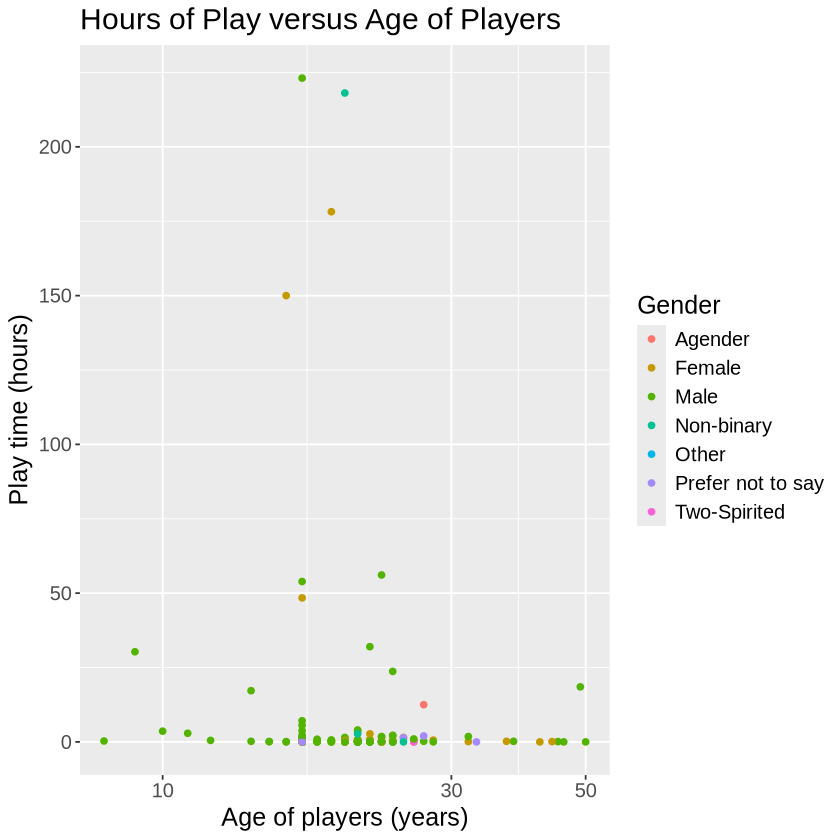

In [4]:
players_scatter_coloured <- players |>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_point(aes(color = gender)) +
    labs(title = "Hours of Play versus Age of Players", x = "Age of players (years)",
         y = "Play time (hours)", color = "Gender") +
    scale_x_log10()+
    theme(text = element_text(size = 15))

players_scatter_coloured

We then have to make the model for the regression.

Because regression is done with numerical values, we can arbitratily assign numerical values to our gender variable.
- Male = 1
- Female = 2
- Non-binary = 3
- Other = 7 
- Prefer not to say = 4
- Two-spirited = 6


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
34,rmse,standard,30.47152,5,5.337726,Preprocessor1_Model12
37,rmse,standard,30.19009,5,5.527381,Preprocessor1_Model13
40,rmse,standard,30.20083,5,5.544919,Preprocessor1_Model14
43,rmse,standard,30.13829,5,5.637122,Preprocessor1_Model15
46,rmse,standard,30.10258,5,5.676553,Preprocessor1_Model16
49,rmse,standard,30.09730,5,5.696231,Preprocessor1_Model17


.pred,Age,gender,played_hours
<dbl>,<dbl>,<dbl>,<dbl>
7.497297,22,2,0.0
6.686486,17,1,0.0
1.145946,23,1,1.8
1.145946,20,1,0.4
6.686486,17,1,0.0
1.145946,24,1,2.2


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,13.00473


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


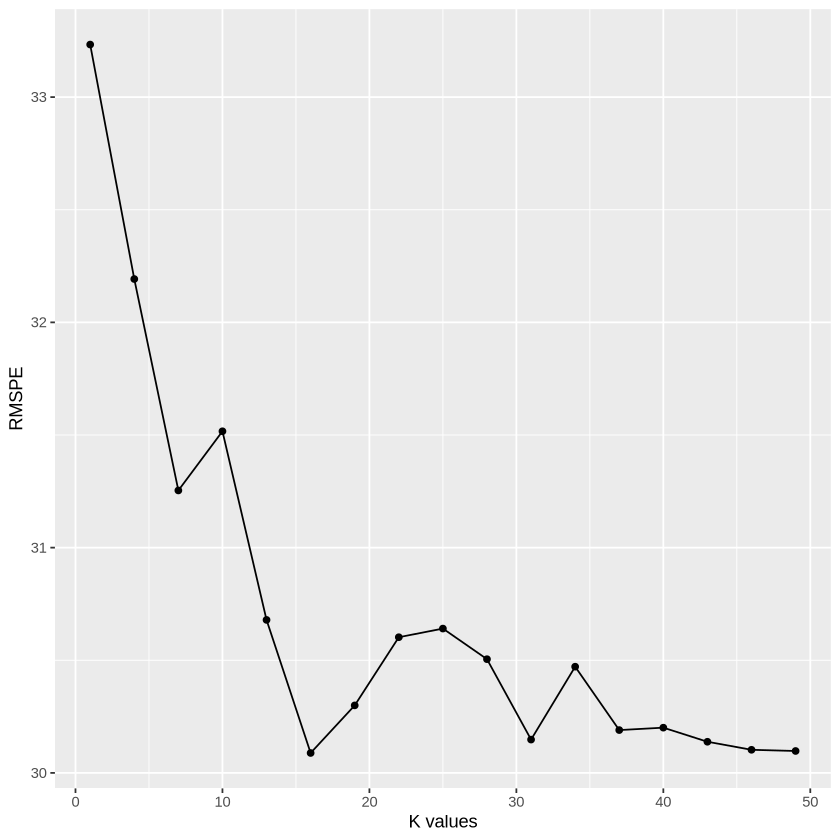

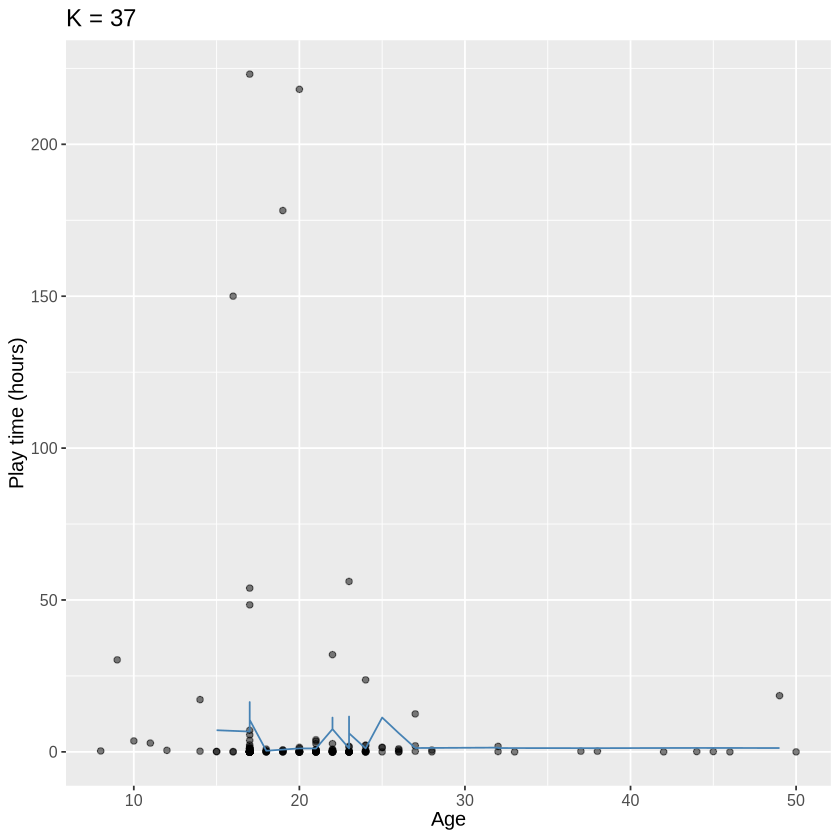

In [6]:
set.seed(233)

hours_split<-initial_split(player_selected, prop=0.75, strata=played_hours)
hours_train<-training(hours_split)|> drop_na()
hours_test<-testing(hours_split)|> drop_na()


player_recipe <- recipe(played_hours~., data = hours_train) |>
                 step_scale(all_predictors()) |>
                 step_center(all_predictors())

player_spec <- nearest_neighbor(weight_func = "rectangular",
                              neighbors = tune()) |>
                              set_engine("kknn") |>
                              set_mode("regression")
player_vfold <- vfold_cv(hours_train, v = 5, strata = played_hours)

player_wkflw <- workflow() |>
  add_recipe(player_recipe) |>
  add_model(player_spec)

gridvals <- tibble(neighbors = seq(from = 1, to = 50, by = 3))

player_results <- player_wkflw |>
  tune_grid(resamples = player_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")


player_plot<-ggplot(player_results, aes(x=neighbors,y=mean))+
              geom_point()+
              geom_line()+
              labs(x="K values", y="RMSPE")
player_plot

tail(player_results)

kmin <- 37

player_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) |>
  set_engine("kknn") |>
  set_mode("regression")

player_fit <- workflow() |>
  add_recipe(player_recipe) |>
  add_model(player_spec) |>
  fit(data = hours_train)

player_summary <- player_fit |>
 predict(hours_test) |>
 bind_cols(hours_test)
head(player_summary)
player_metrics<-metrics(player_summary, truth = played_hours, estimate = .pred) |>
                filter(.metric == 'rmse')

player_metrics

final_plot <- ggplot(player_selected, aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.5) +
  geom_line(data = player_summary,
            mapping = aes(x = Age, y = .pred),
            color = "steelblue",) +
  xlab("Age") +
  ylab("Play time (hours)") +
  ggtitle("K = 37") +
  theme(text = element_text(size = 12))
final_plot